# Airline Review Scraping with Python

This Jupyter Notebook demonstrates how to scrape airline reviews from the Airline Quality website.

### Imports

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from wordcloud import WordCloud
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import plotly.express as px

### Introduction

This Jupyter Notebook demonstrates the scraping of airline reviews from the Airline Quality website.

**Data Collection:**

- The script scrapes reviews from multiple pages, extracting text, ratings, and categories.
- The scraped data is stored in a Pandas DataFrame for further analysis.

**Data Analysis:**

- The collected data can be analyzed to understand customer sentiment, identify common issues, and gain insights into airline performance.

**Visualization:**

- The scraped data can be visualized using various plotting libraries to create charts and graphs that illustrate key findings.

### Data Scraping

Define Variables

Here, we define several variables to configure the scraping process:

* `base_url`: The base URL of the Airline Quality website for British Airways reviews.
* `pages`: The number of pages from which reviews will be scraped.
* `page_size`: The number of reviews to scrape per page.
* `reviews`: An empty list to store the scraped review text.
* `aircraft`: (Optional) An empty list to store data on aircraft types (if available).
* `seat_type`: (Optional) An empty list to store data on seat types (if available).
* `route`: (Optional) An empty list to store data on routes (if available).
* `recommended`: (Optional) An empty list to store data on whether reviews recommend the airline (if available).
* `df`: An empty DataFrame to store the scraped review data in a structured format.

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20 
page_size = 100 

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()


Loop Through Pages

This section iterates through the specified number of pages to scrape reviews:

1. For each page:
    * A message is printed indicating the current page being scraped.
    * The URL for the specific page is constructed using the base URL, page number, sorting criteria, and page size.

2. We fetch the HTML content from the constructed URL using `requests.get()`.
3. The content is parsed using `BeautifulSoup` to create a structured representation.
4. Extract Reviews and Corresponding Data (explanation):**

Extract Reviews and Corresponding Data

This section parses the HTML content of each page to extract relevant data:

- Review Text: We find and extract the actual review text using the class name "text_content".

- Review Ratings and Categories:
    - We iterate through elements with the class name "review-stats".
    - Within each element, we:
        * Extract review ratings (e.g., stars, recommended) from elements with the class "review-value".
        * Separate the recommended value for later processing.
        * Extract the number of filled stars using elements with the class "review-rating-stars stars" and counting filled stars ("star fill").
        * Re-attach the recommended value back to the ratings list.
        * Extract review categories (e.g., Overall Rating) using elements with the class "review-rating-header".
    * We create a DataFrame from the extracted ratings and categories using `pandas.DataFrame`.
    * We append this DataFrame to the main `df` DataFrame, handling potential errors using a `try-except` block.
    * We clear temporary lists (`review_ratings` and `review_categories`) for the next iteration.

- After processing each element with class "review-stats", we print a message indicating the total number of reviews scraped from that page.

In [4]:
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")



Scraping page 1


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 100 total reviews
Scraping page 2


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 200 total reviews
Scraping page 3


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 300 total reviews
Scraping page 4


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 400 total reviews
Scraping page 5


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 500 total reviews
Scraping page 6


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 600 total reviews
Scraping page 7


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 700 total reviews
Scraping page 8


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 800 total reviews
Scraping page 9


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 900 total reviews
Scraping page 10


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1000 total reviews
Scraping page 11


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1100 total reviews
Scraping page 12


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1200 total reviews
Scraping page 13


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1300 total reviews
Scraping page 14


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1400 total reviews
Scraping page 15


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1500 total reviews
Scraping page 16


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1600 total reviews
Scraping page 17


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1700 total reviews
Scraping page 18


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1800 total reviews
Scraping page 19


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/2653134933.py:32: FutureWarning: The frame.append method is deprecated and will b

Add Reviews as a Separate Column

Finally, we add the scraped review text as a separate column named "reviews" to the DataFrame `df`.

In [5]:
df["reviews"] = reviews

In [6]:
df.head()

Type Of Traveller       Seat Type                         Route  \
0    Couple Leisure  Business Class               London to Crete   
1          Business  Business Class             Berlin to London    
2    Family Leisure  Business Class             London to Toronto   
3      Solo Leisure   Economy Class             London to Denver    
4    Family Leisure  Business Class  London to Hong Kong via Doha   

       Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0  September 2024           2.0                  1.0               1.0   
1     August 2024           3.0                  1.0               3.0   
2     August 2024           4.0                  4.0               4.0   
3     August 2024           1.0                  1.0               NaN   
4       July 2024           4.0                  1.0               3.0   

   Inflight Entertainment  Ground Service  Wifi & Connectivity  \
0                     1.0             2.0                  3.0   
1                     NaN             1.0                  NaN   
2                     5.0             4.0                  5.0   
3                     NaN             1.0                  NaN   
4                     4.0             1.0                  4.0   

   Value For Money Recommended        Aircraft  \
0                2          no             NaN   
1                1          no            A319   
2                4         yes  Boeing 777-200   
3                1          no             NaN   
4                1          no             NaN   

                                             reviews  
0  ✅ Trip Verified | As someone who flies relentl...  
1  ✅ Trip Verified |   Flew with British Airways ...  
2  ✅ Trip Verified |   Straightforward check in T...  
3  Not Verified | I am beyond upset and disgusted...  
4  ✅ Trip Verified |   I purchased round trip dir...

Additional Notes

- Consider adding more detailed explanations and comments within the code for better clarity.
- For larger-scale scraping projects, robust scraping libraries like `scrapy` might be more efficient.
- Ensure you adhere to the website's terms of service when scraping data.

### Data Cleaner

In [7]:
reviews = pd.DataFrame()
reviews["raw_reviews"] = df["reviews"]
reviews.head()

raw_reviews
0  ✅ Trip Verified | As someone who flies relentl...
1  ✅ Trip Verified |   Flew with British Airways ...
2  ✅ Trip Verified |   Straightforward check in T...
3  Not Verified | I am beyond upset and disgusted...
4  ✅ Trip Verified |   I purchased round trip dir...

**Split and Extract**

Split the "raw_reviews" column by the pipe character (`|`) and extract the second column (index 1), which is assumed to contain the desired review text.

In [8]:
reviews["raw_reviews"]= reviews["raw_reviews"].str.split('|',expand=True)[1]

In [9]:
reviews.head()

raw_reviews
0   As someone who flies relentlessly with Britis...
1     Flew with British Airways club Europe on Sa...
2     Straightforward check in T5. New site for c...
3   I am beyond upset and disgusted with the disr...
4     I purchased round trip direct flight busine...

In [10]:
reviews.shape

(2000, 1)

**Define Cleaning Function**

Define a function `clean` that:

- Removes all special characters and numbers using regular expressions.
- Converts the text to lowercase.

**Clean Reviews**

Apply the `clean` function to the "raw_reviews" column, creating a new "cleaned_reviews" column with the cleaned text.

In [11]:
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    # Convert the text to lowercase
    text = text.lower()
    return text

# Cleaning the text in the review column
reviews["cleaned_reviews"] = reviews["raw_reviews"].apply(clean)
reviews.head()

raw_reviews  \
0   As someone who flies relentlessly with Britis...   
1     Flew with British Airways club Europe on Sa...   
2     Straightforward check in T5. New site for c...   
3   I am beyond upset and disgusted with the disr...   
4     I purchased round trip direct flight busine...   

                                     cleaned_reviews  
0   as someone who flies relentlessly with britis...  
1   flew with british airways club europe on satu...  
2   straightforward check in t new site for club ...  
3   i am beyond upset and disgusted with the disr...  
4   i purchased round trip direct flight business...

### Pre Process Texts

**Function Definition**

Defines the `preprocess_text` function with the following parameters:

- `text`: The input text to be preprocessed.
- `custom_stopwords`: An optional set of additional stopwords to remove.

**Handle Empty Text**

If the input `text` is empty, an empty string is returned to avoid errors.

**Natural Language Processing**

Processes the input text using the `nlp` object from a pre-trained NLP model (e.g., spaCy).

**Combine Stopwords**

Creates a combined set of stopwords by merging the default stop words from `STOP_WORDS` with any custom stopwords provided.

**Join Lemmatized Tokens**

Joins the lemmatized tokens back into a single string, separated by spaces.

**Example Usage**

Applies the `preprocess_text` function to the "cleaned_reviews" column of the `reviews` DataFrame to create a new "Lemma" column with the preprocessed text.

Demonstrates how to use custom stopwords by creating a "Lemma_Custom" column with the preprocessed text using a lambda function that passes custom stopwords to the `preprocess_text` function.

In [12]:
def preprocess_text(text, custom_stopwords=None):
    """
    Preprocesses text by tokenizing, removing stopwords, and lemmatizing.

    Args:
        text (str): The text to be processed.
        custom_stopwords (set, optional): A set of additional stopwords to remove.

    Returns:
        str: The preprocessed text with lemmatized tokens.
    """
    if not text:
        return ""

    doc = nlp(text)

    # Combine default and custom stopwords if provided
    stopwords = STOP_WORDS.copy()
    if custom_stopwords:
        stopwords.update(custom_stopwords)

    # Lemmatize and filter out stopwords
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() not in stopwords]

    return " ".join(lemmatized_tokens)

# Assuming you have a DataFrame 'reviews' with a 'cleaned_reviews' column
reviews['Lemma'] = reviews['cleaned_reviews'].apply(preprocess_text)

# Example usage with custom stopwords
custom_stopwords = {"example", "custom"}
reviews['Lemma_Custom'] = reviews['cleaned_reviews'].apply(lambda text: preprocess_text(text, custom_stopwords))

In [13]:
reviews.head()
reviews.to_csv('./data/cleaned_data.csv')

### Sentiment Analysis

**Sentiment Analysis**

Uses the `analyzer` object from the VADER sentiment analysis tool to calculate the polarity scores of the input `review`.
**Extract Compound Score**

Extracts the compound score from the calculated polarity scores. The compound score is a float value ranging from -1 to 1, where:

- -1 indicates a highly negative sentiment.
- 0 indicates a neutral sentiment.
- 1 indicates a highly positive sentiment.
**Apply to DataFrame**

Applies the `vadersentimentanalysis` function to the "Lemma_Custom" column of the `reviews` DataFrame, creating a new "Sentiment" column with the calculated sentiment scores.

In [14]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

reviews['Sentiment'] = reviews['Lemma_Custom'].apply(vadersentimentanalysis)



**Approach 1: Simple Threshold**

Applies a lambda function to the "Sentiment" column:

- If the compound score is greater than or equal to 0.5, the sentiment is categorized as "Positive."
- If the compound score is less than 0, the sentiment is categorized as "Negative."
- Otherwise, the sentiment is categorized as "Neutral."

**Approach 2: Using Bins**

Defines bins and labels for categorization:

- `bins`: Defines the boundaries for the categories (adjust as needed).
- `labels`: Defines the corresponding labels for each bin.

Applies the `pd.cut` function to the "Sentiment" column with the specified bins and labels, categorizing the sentiment based on the score range.

In [15]:
# function to analyse
reviews['Analysis'] = reviews['Sentiment'].apply(lambda compound: 'Positive' if compound >= 0.5 else 'Negative' if compound < 0 else 'Neutral')
# reviews['Analysis'] = reviews['Sentiment'].apply(vader_analysis)
bins = [-1, -0.05, 0.05, 1]  # Adjust bins as needed
labels = ['Negative', 'Neutral', 'Positive']
reviews['Analysis'] = pd.cut(reviews['Sentiment'], bins=bins, labels=labels)
reviews['Sentiment'] = reviews['Lemma_Custom'].fillna('').apply(vadersentimentanalysis)

In [16]:
reviews.head()

raw_reviews  \
0   As someone who flies relentlessly with Britis...   
1     Flew with British Airways club Europe on Sa...   
2     Straightforward check in T5. New site for c...   
3   I am beyond upset and disgusted with the disr...   
4     I purchased round trip direct flight busine...   

                                     cleaned_reviews  \
0   as someone who flies relentlessly with britis...   
1   flew with british airways club europe on satu...   
2   straightforward check in t new site for club ...   
3   i am beyond upset and disgusted with the disr...   
4   i purchased round trip direct flight business...   

                                               Lemma  \
0    fly relentlessly british airway business ple...   
1    fly british airways club europe saturday st ...   
2    straightforward check t new site club check ...   
3    upset disgust disregard lack knowledge lie c...   
4    purchase round trip direct flight business c...   

                                        Lemma_Custom  Sentiment  Analysis  
0    fly relentlessly british airway business ple...     0.8225  Positive  
1    fly british airways club europe saturday st ...    -0.8402  Negative  
2    straightforward check t new site club check ...     0.6486  Positive  
3    upset disgust disregard lack knowledge lie c...    -0.9726  Negative  
4    purchase round trip direct flight business c...    -0.8720  Negative

**Calculate Value Counts**

- `reviews['Analysis']`: Selects the "Analysis" column from the `reviews` DataFrame, containing the sentiment analysis categories.
- `value_counts()`: Counts the occurrences of each unique value in the "Analysis" column.

**Output**

The output will be a Pandas Series where:

- The index contains the unique values from the "Analysis" column (e.g., "Positive," "Negative," "Neutral").
- The values represent the corresponding counts (i.e., the number of times each unique value appears).

In [17]:
counter = reviews['Analysis'].value_counts()
counter

Positive    1199
Negative     777
Neutral       24
Name: Analysis, dtype: int64

### Data Visualisation

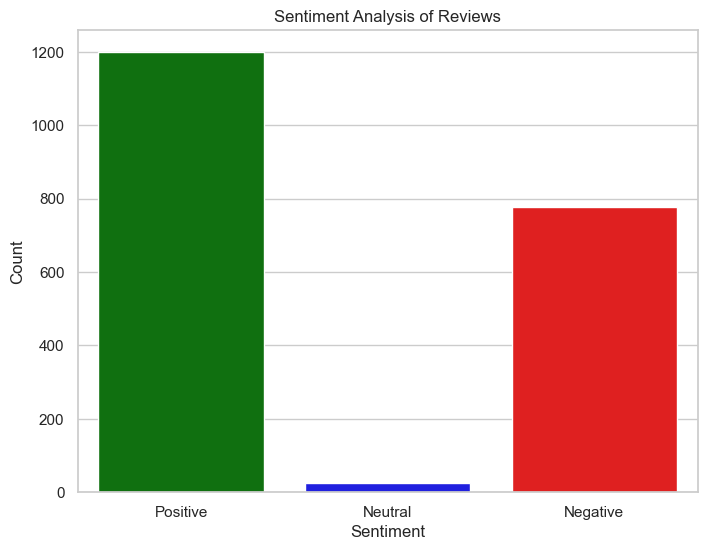

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a visually appealing style
sns.set_theme(style="whitegrid")

# Plotting the count of each sentiment category
plt.figure(figsize=(8, 6))
sns.countplot(x='Analysis', data=reviews, order=['Positive', 'Neutral', 'Negative'], palette=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Review Analysis

([<matplotlib.patches.Wedge at 0x17bc88f10>,
 [Text(-0.33827496900780224, 1.0466948195834211, 'Positive'),
  Text(0.29858451467612557, -1.0587007545079123, 'Negative'),
  Text(1.3490407898345809, -0.05088169968161623, 'Neutral')],
 [Text(-0.1845136194588012, 0.5709244470455024, '60.0%'),
  Text(0.16286428073243212, -0.5774731388224976, '38.9%'),
  Text(0.8493960528588103, -0.03203662572546207, '1.2%')])

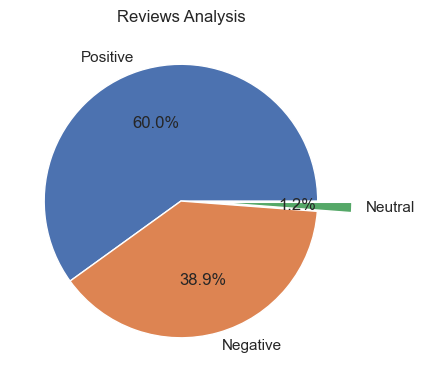

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(counter.values, labels = counter.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

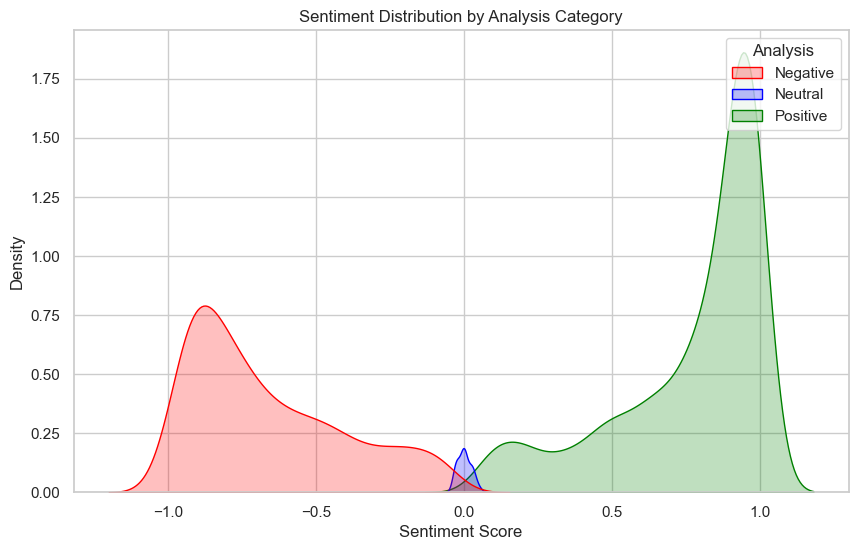

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=reviews, x='Sentiment', hue='Analysis', fill=True, palette=['red', 'blue', 'green'])
plt.title('Sentiment Distribution by Analysis Category')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

Trying to identify elements/keywords of importance in each bin

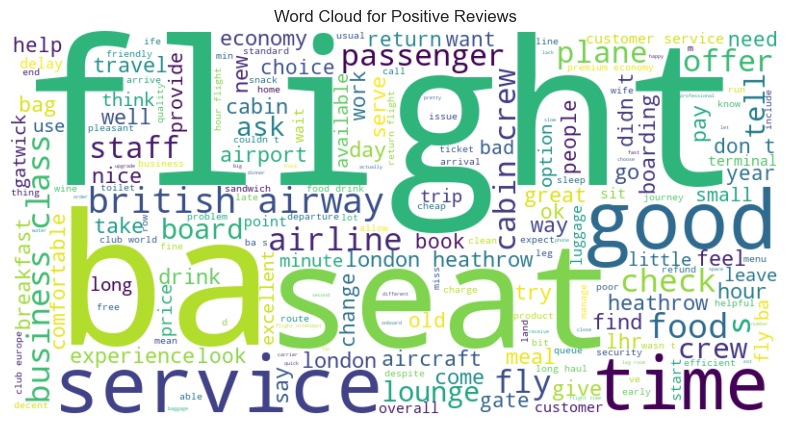

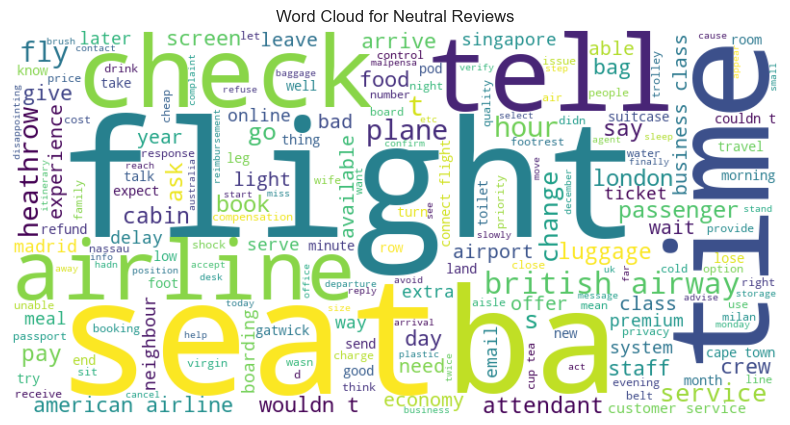

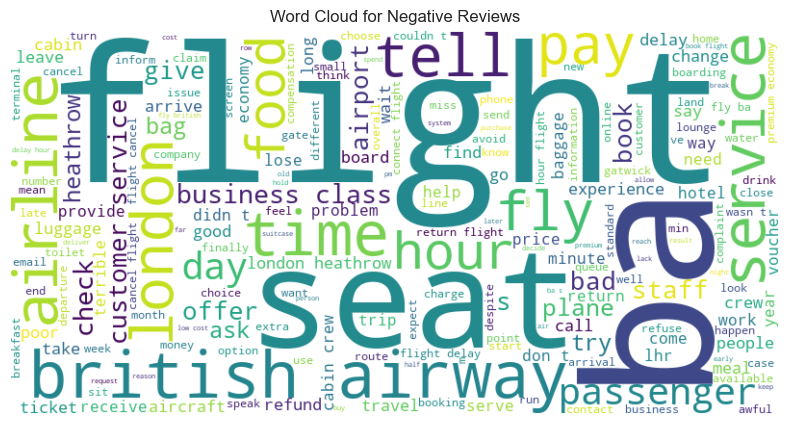

In [21]:
from wordcloud import WordCloud

for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(reviews[reviews['Analysis'] == sentiment]['Lemma_Custom'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

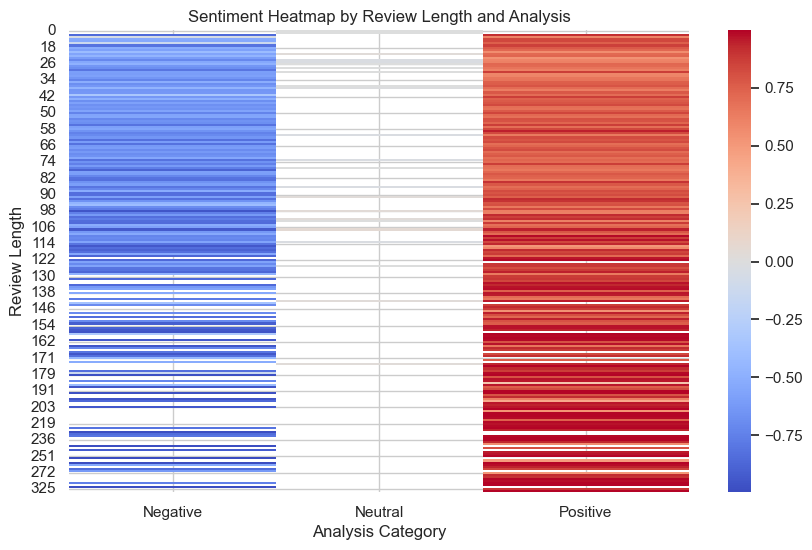

In [22]:
reviews['Review Length'] = reviews['Lemma_Custom'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.heatmap(reviews.pivot_table(index='Review Length', columns='Analysis', values='Sentiment', aggfunc='mean'), cmap='coolwarm')
plt.title('Sentiment Heatmap by Review Length and Analysis')
plt.xlabel('Analysis Category')
plt.ylabel('Review Length')
plt.show()

This is an interactive plot

In [23]:
fig = px.scatter(reviews, x='Sentiment', y='Review Length', color='Analysis', 
                 hover_data=['cleaned_reviews'],
                 title='Interactive Sentiment Scatter Plot')
fig.show()

Word analysis of every segment
1. food and drinks
2. money, refund and value

In [24]:
data = reviews[reviews['Lemma_Custom'].str.contains('food | drink')]

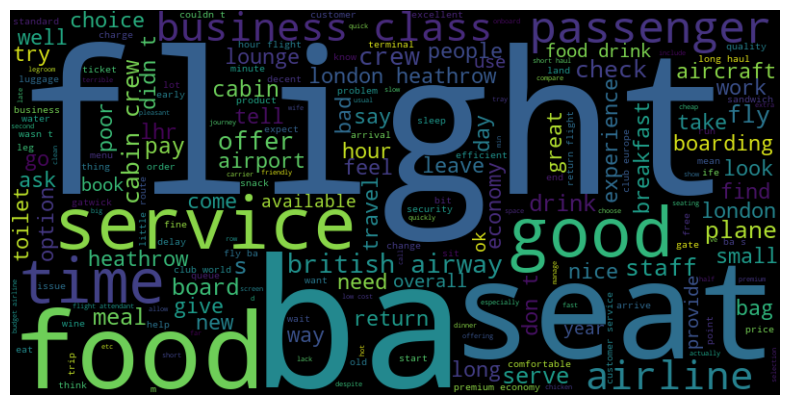

In [25]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['Lemma_Custom']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
data = reviews[reviews['Lemma_Custom'].str.contains('money | refund & value')]

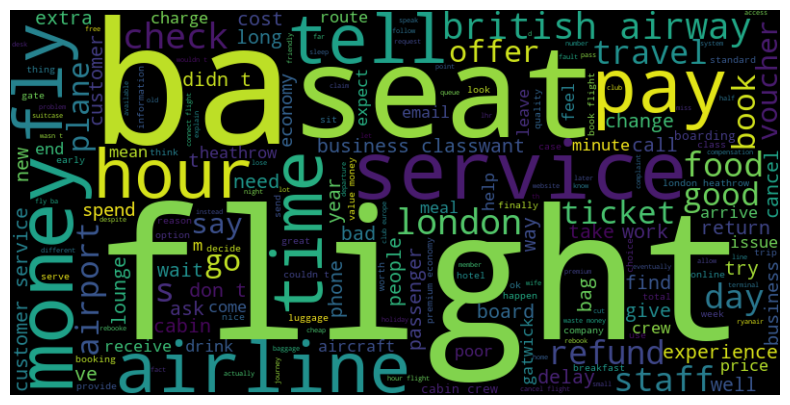

In [27]:

wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['Lemma_Custom']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Now We start visualising on the basis of all the provided ratings to gain insights rather than the textual review

In [28]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

Seat Comfort  Cabin Staff Service  Food & Beverages  \
count   1267.000000          1253.000000       1049.000000   
mean       2.075770             2.367917          1.771211   
std        1.062326             1.304756          1.015665   
min        1.000000             1.000000          1.000000   
25%        1.000000             1.000000          1.000000   
50%        2.000000             2.000000          1.000000   
75%        3.000000             3.000000          2.000000   
max        5.000000             5.000000          5.000000   

       Inflight Entertainment  Ground Service  Wifi & Connectivity  \
count              750.000000     1310.000000           365.000000   
mean                 2.098667        2.012214             1.471233   
std                  1.178750        1.209778             0.939002   
min                  1.000000        1.000000             1.000000   
25%                  1.000000        1.000000             1.000000   
50%                  2.000000        1.000000             1.000000   
75%                  3.000000        3.000000             1.000000   
max                  5.000000        5.000000             5.000000   

       Value For Money  
count      1378.000000  
mean          1.612482  
std           0.863639  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           5.000000

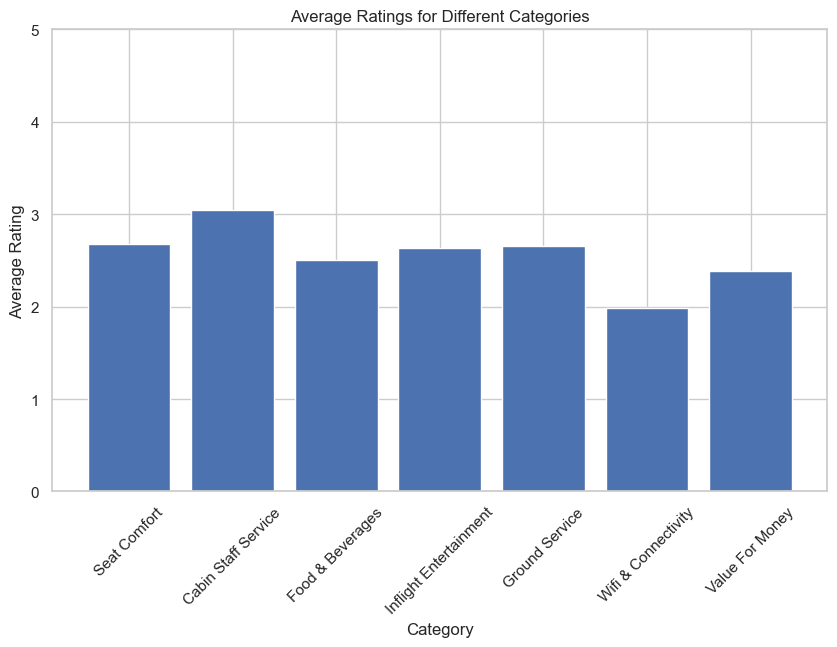

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Calculate the average rating for each category
average_ratings = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment',
                     'Ground Service', 'Wifi & Connectivity', 'Value For Money']].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_ratings.index, average_ratings.values)
plt.title('Average Ratings for Different Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

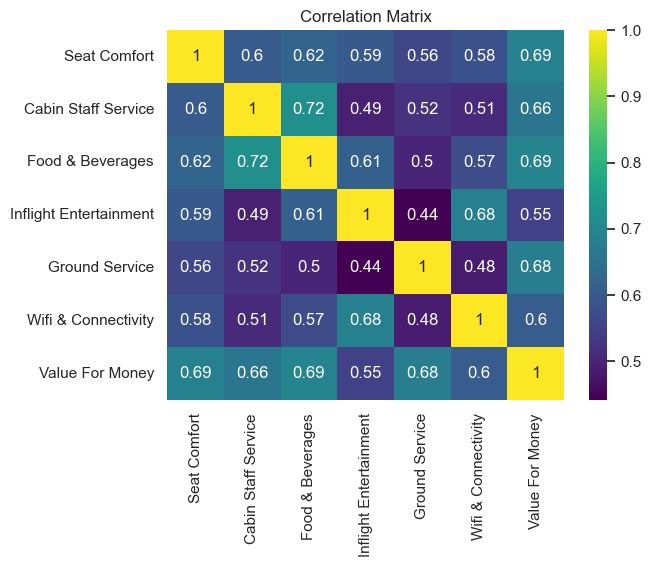

In [30]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment',
                     'Ground Service', 'Wifi & Connectivity', 'Value For Money']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')

In [31]:
df.columns

Index(['Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money',
       'Recommended', 'Aircraft', 'reviews'],
      dtype='object')

**Perform ANOVA Analysis**

Iterates through each combination of categorical and rating variables:

- Groups the data based on the categorical variable using `df[rating_col][df[cat_col] == category]`.
- Performs the ANOVA test using `f_oneway(*groups)`.
- Appends the results (categorical variable, rating variable, F-statistic, p-value) to the `results` list.

ANOVA analysis is used to determine if there are significant differences in rating variables (e.g., "Seat Comfort," "Cabin Staff Service") across different categorical variables (e.g., "Type Of Traveller," "Seat Type").

It helps identify whether the average rating for a particular variable differs significantly between groups defined by the categorical variable. This can be useful for understanding the impact of factors like traveler type or seat type on customer satisfaction.

In [33]:
from scipy.stats import f_oneway
categorical_cols = ['Type Of Traveller', 'Seat Type', 'Route','Aircraft']
rating_cols = ['Seat Comfort','Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment','Ground Service', 'Wifi & Connectivity', 'Value For Money']

object_cols = ['Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Aircraft']
df[object_cols] = df[object_cols].astype(str)

# Handle missing values (e.g., drop rows with missing values)
df.dropna(inplace=True)

# Create an empty list to store the results
results = []

# Perform ANOVA analysis and append results to the list
for cat_col in categorical_cols:
    for rating_col in rating_cols:
        groups = [df[rating_col][df[cat_col] == category] for category in df[cat_col].unique()]
        f_statistic, p_value = f_oneway(*groups)
        results.append([cat_col, rating_col, f_statistic, p_value])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Categorical Variable', 'Rating Variable', 'F-Statistic', 'p-value'])

# Print the DataFrame
print(results_df)

   Categorical Variable         Rating Variable  F-Statistic       p-value
0     Type Of Traveller            Seat Comfort     1.514585  2.100235e-01
1     Type Of Traveller     Cabin Staff Service     0.628696  5.967880e-01
2     Type Of Traveller        Food & Beverages     2.209023  8.636911e-02
3     Type Of Traveller  Inflight Entertainment     2.592469  5.221209e-02
4     Type Of Traveller          Ground Service     1.636823  1.801262e-01
5     Type Of Traveller     Wifi & Connectivity     2.548897  5.530354e-02
6     Type Of Traveller         Value For Money     3.099445  2.660492e-02
7             Seat Type            Seat Comfort     5.069504  1.844228e-03
8             Seat Type     Cabin Staff Service     5.292455  1.360045e-03
9             Seat Type        Food & Beverages     6.778278  1.779986e-04
10            Seat Type  Inflight Entertainment     4.196103  6.059619e-03
11            Seat Type          Ground Service     2.543379  5.570760e-02
12            Seat Type  

/var/folders/mc/l4_t7brd2v3cy_nrw6jzyjf40000gn/T/ipykernel_2827/4115388036.py:23: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



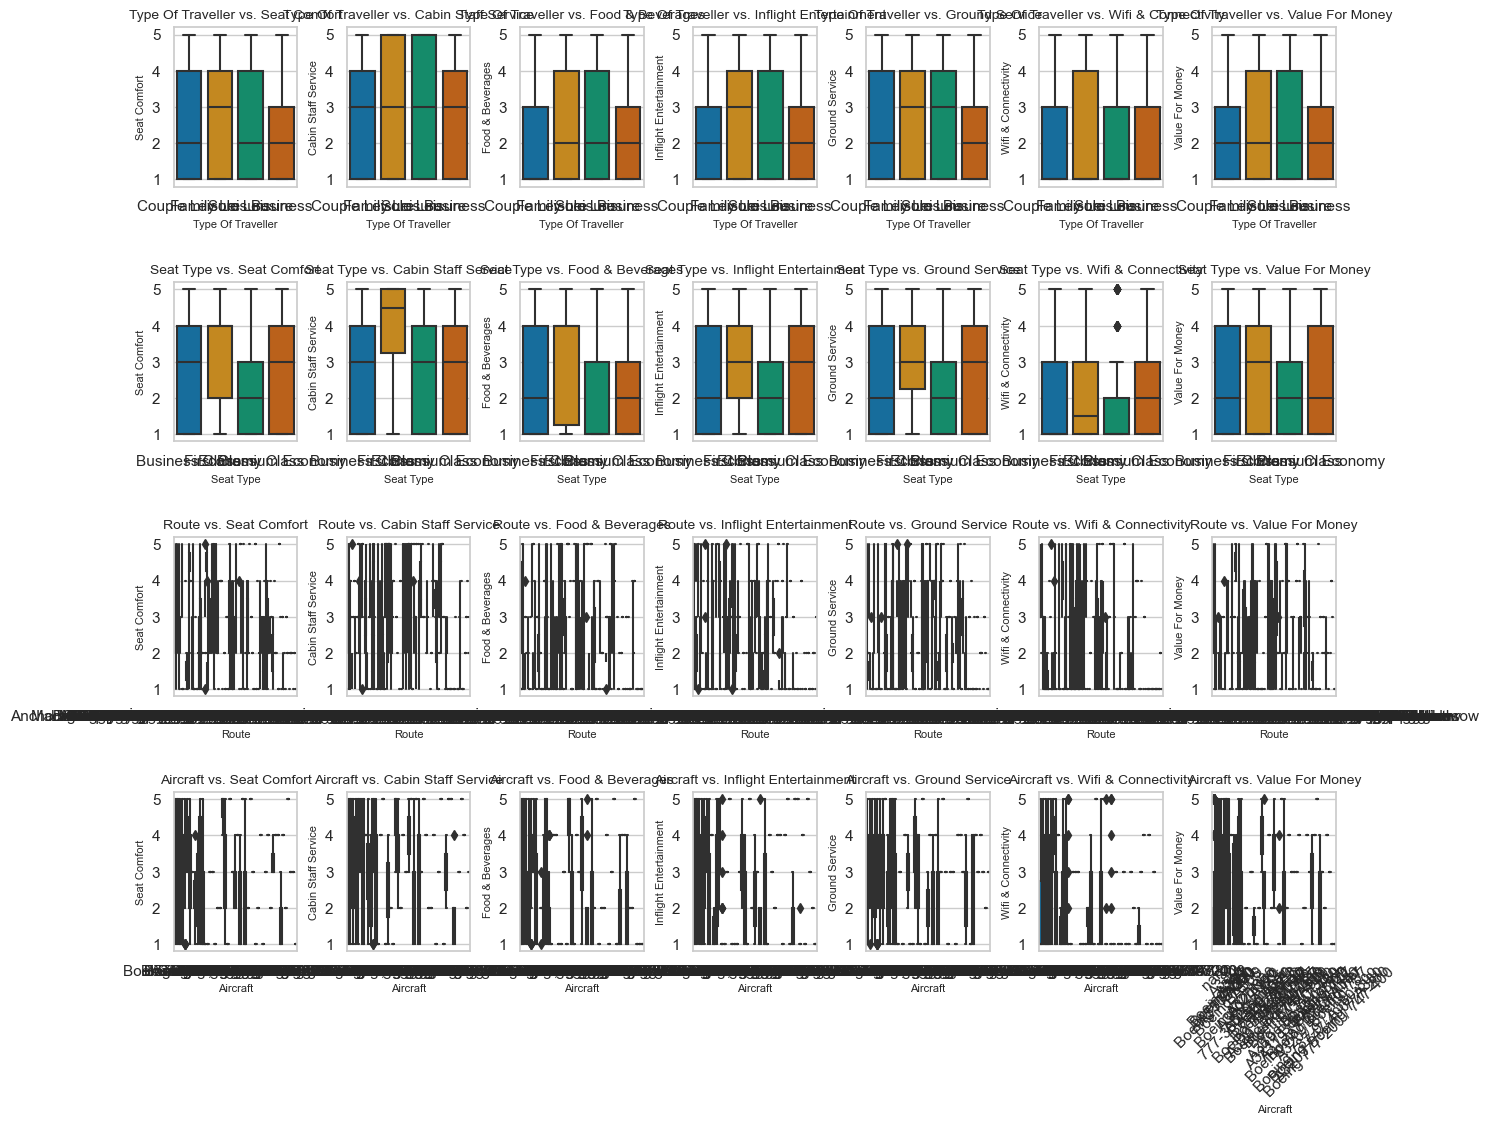

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Set a larger figure size for better readability
fig, axes = plt.subplots(len(categorical_cols), len(rating_cols), figsize=(15, 12))

# Iterate over categorical and rating columns
for i, cat_col in enumerate(categorical_cols):
    for j, rating_col in enumerate(rating_cols):
        # Create a box plot with a color palette for better differentiation
        sns.boxplot(x=cat_col, y=rating_col, data=df, ax=axes[i, j], palette='colorblind')
        axes[i, j].set_title(f"{cat_col} vs. {rating_col}", fontsize=10)
        axes[i, j].set_xlabel(f"{cat_col}", fontsize=8)
        axes[i, j].set_ylabel(f"{rating_col}", fontsize=8)
        plt.xticks(rotation=45)  # Rotate tick labels

# Adjust spacing between subplots for clarity
plt.subplots_adjust(hspace=0.6, wspace=0.4)

# Show the plots
plt.tight_layout()
plt.show()